# External modules

In [1]:
library(tidyverse)
library(readr)
library(DescTools)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Internal functions

In [2]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima_with_indexes.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_ns_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_ns_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_normalized_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_several_ns_gev_model_normalized_parameters.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_non_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_non_stationary_gev_mixture_model_quantile.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_estimate_non_stationary_gev_mixture_model_quantile.R"))

Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:DescTools’:

    MAE, RMSE


The following object is masked from ‘package:purrr’:

    lift




In [3]:
options(repr.plot.width=19, repr.plot.height=12)

# Data

In [4]:
n <- 10000

x <- rexp(n)

# EDA

------------------------------------------------------------------------------ 
x (numeric)

            length                n              NAs           unique'
            10'000           10'000                0              = n
                             100.0%             0.0%                 
                                                                     
               .05              .10              .25           median
   0.0541659505086  0.1099611718673  0.2924666250220  0.6998912137845
                                                                     
             range               sd            vcoef              mad
  11.9945462774862  1.0201170388306  1.0118169733068  0.7198518081627
                                                                     
               0s             mean           meanCI
                0  1.0082031293631  0.9882067822776
             0.0%                   1.0281994764487
                                                  

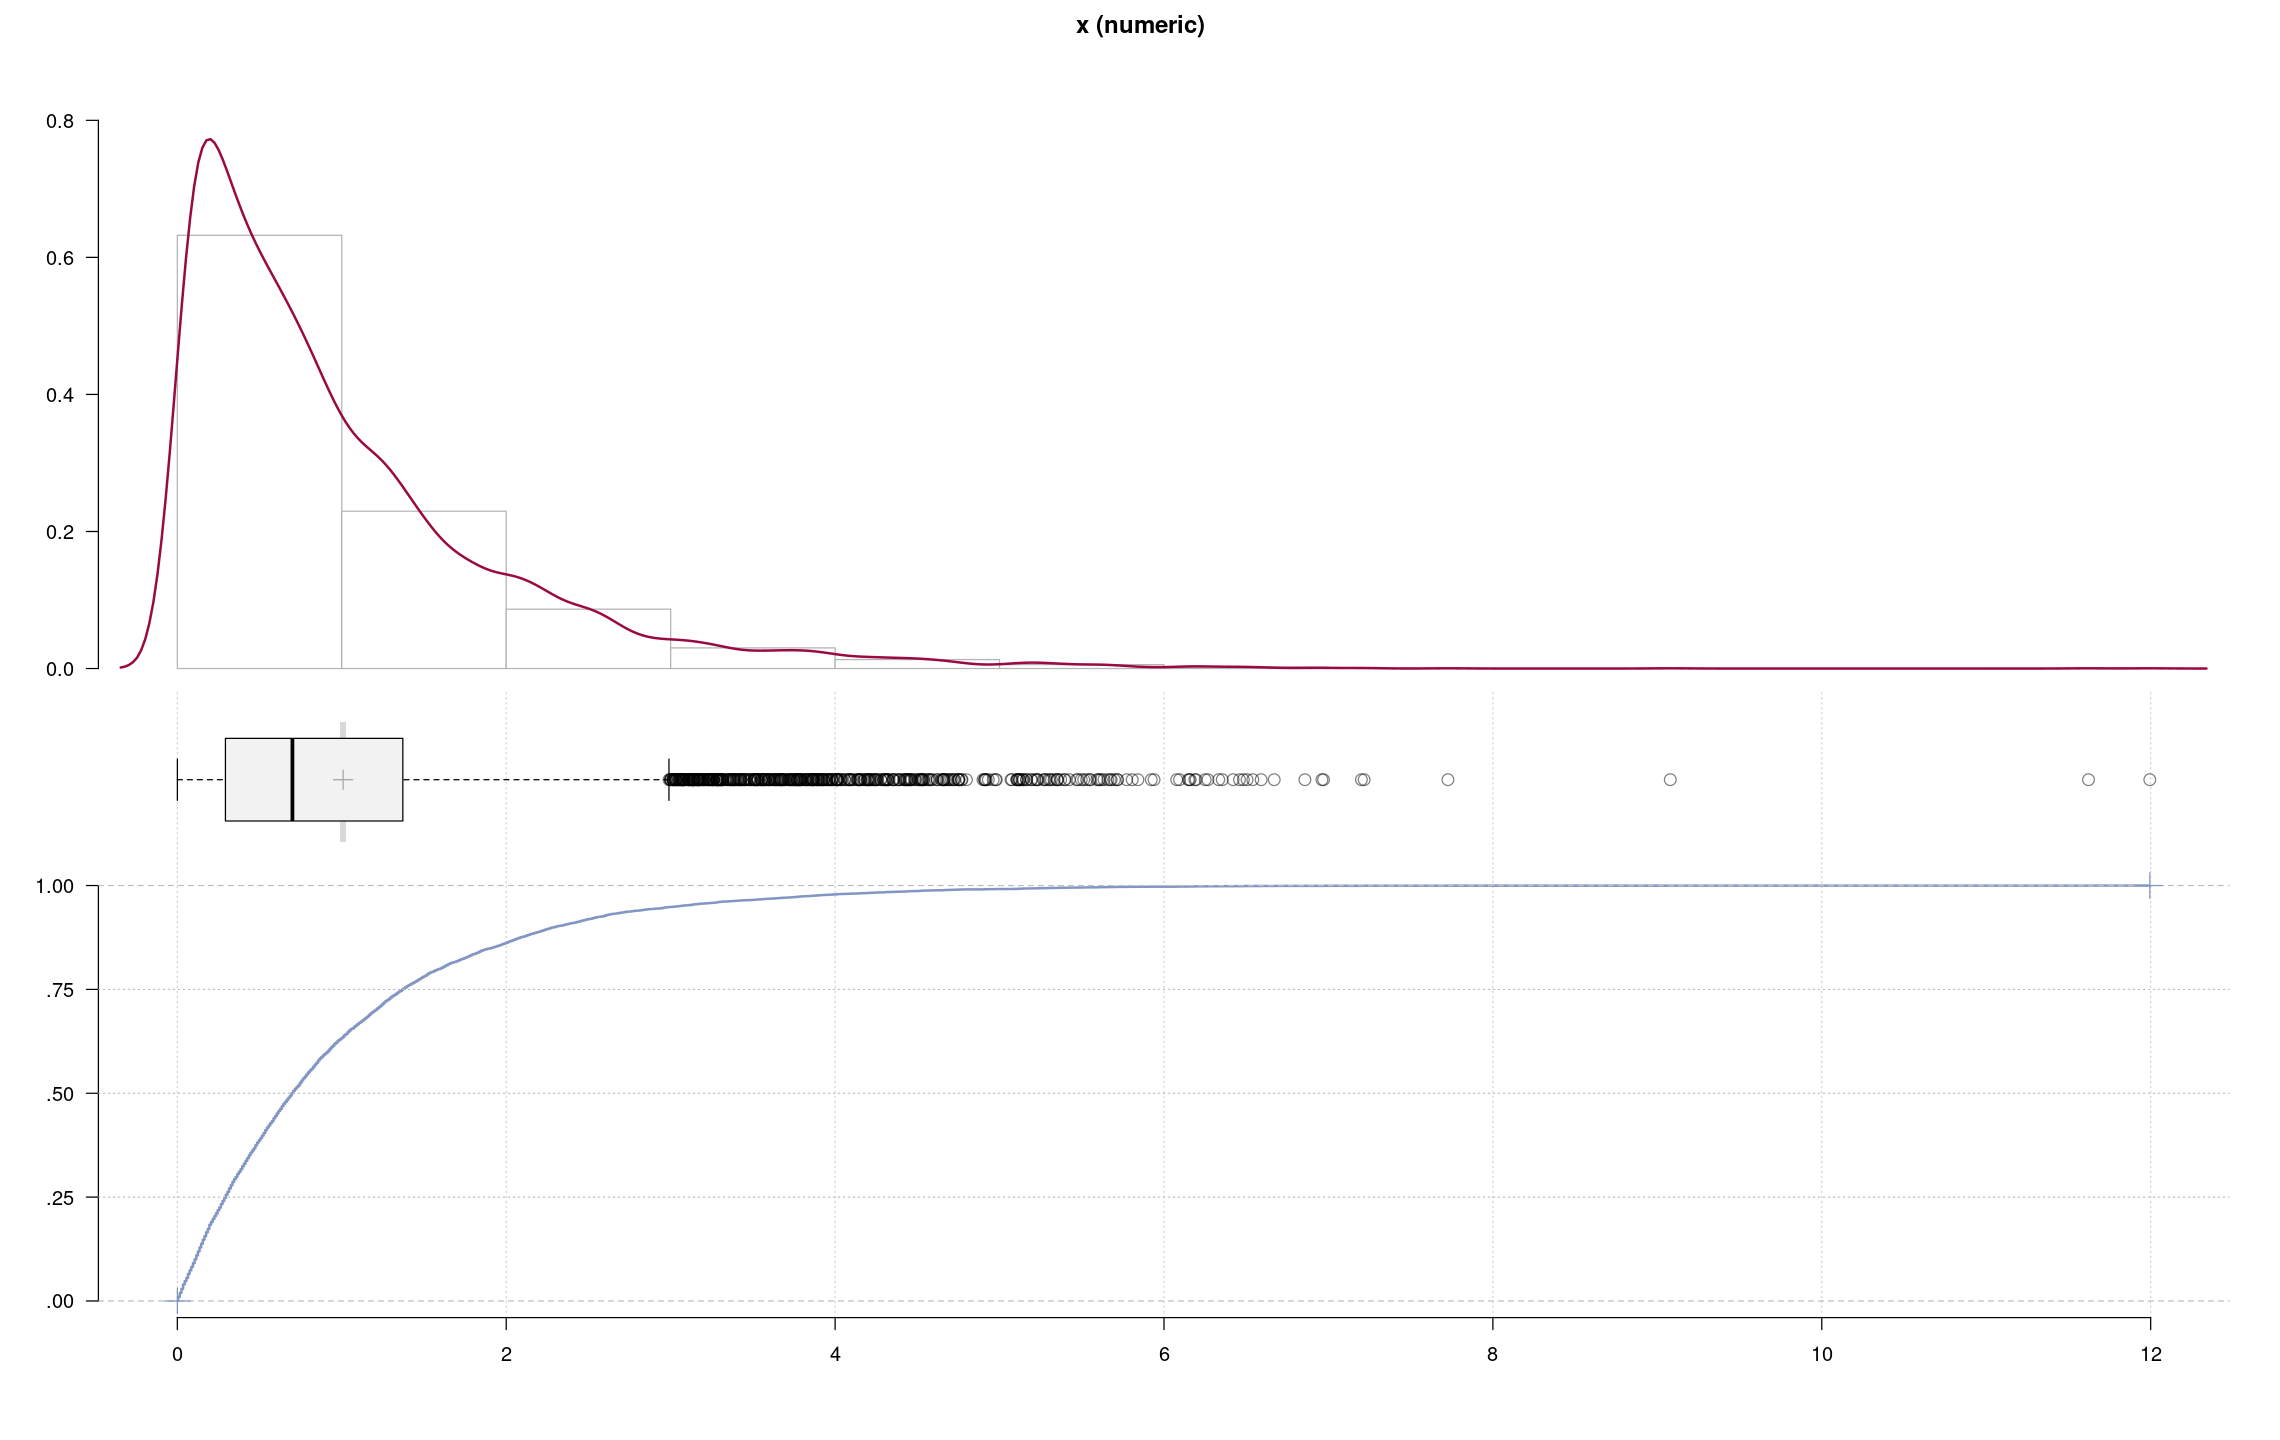

In [5]:
Desc(x)

------------------------------------------------------------------------------ 
y (numeric)

        length            n          NAs       unique           0s         mean'
         3'000        3'000            0          = n            0  2.222337565
                     100.0%         0.0%                      0.0%             
                                                                               
           .05          .10          .25       median          .75          .90
   1.252122564  1.298553954  1.474318339  1.913047872  2.574350899  3.668455041
                                                                               
         range           sd        vcoef          mad          IQR         skew
  10.788048010  1.049207889  0.472119045  0.744218281  1.100032560  2.119956236
                                                                               
       meanCI
  2.184777674
  2.259897455
             
          .95
  4.379919850
             
        

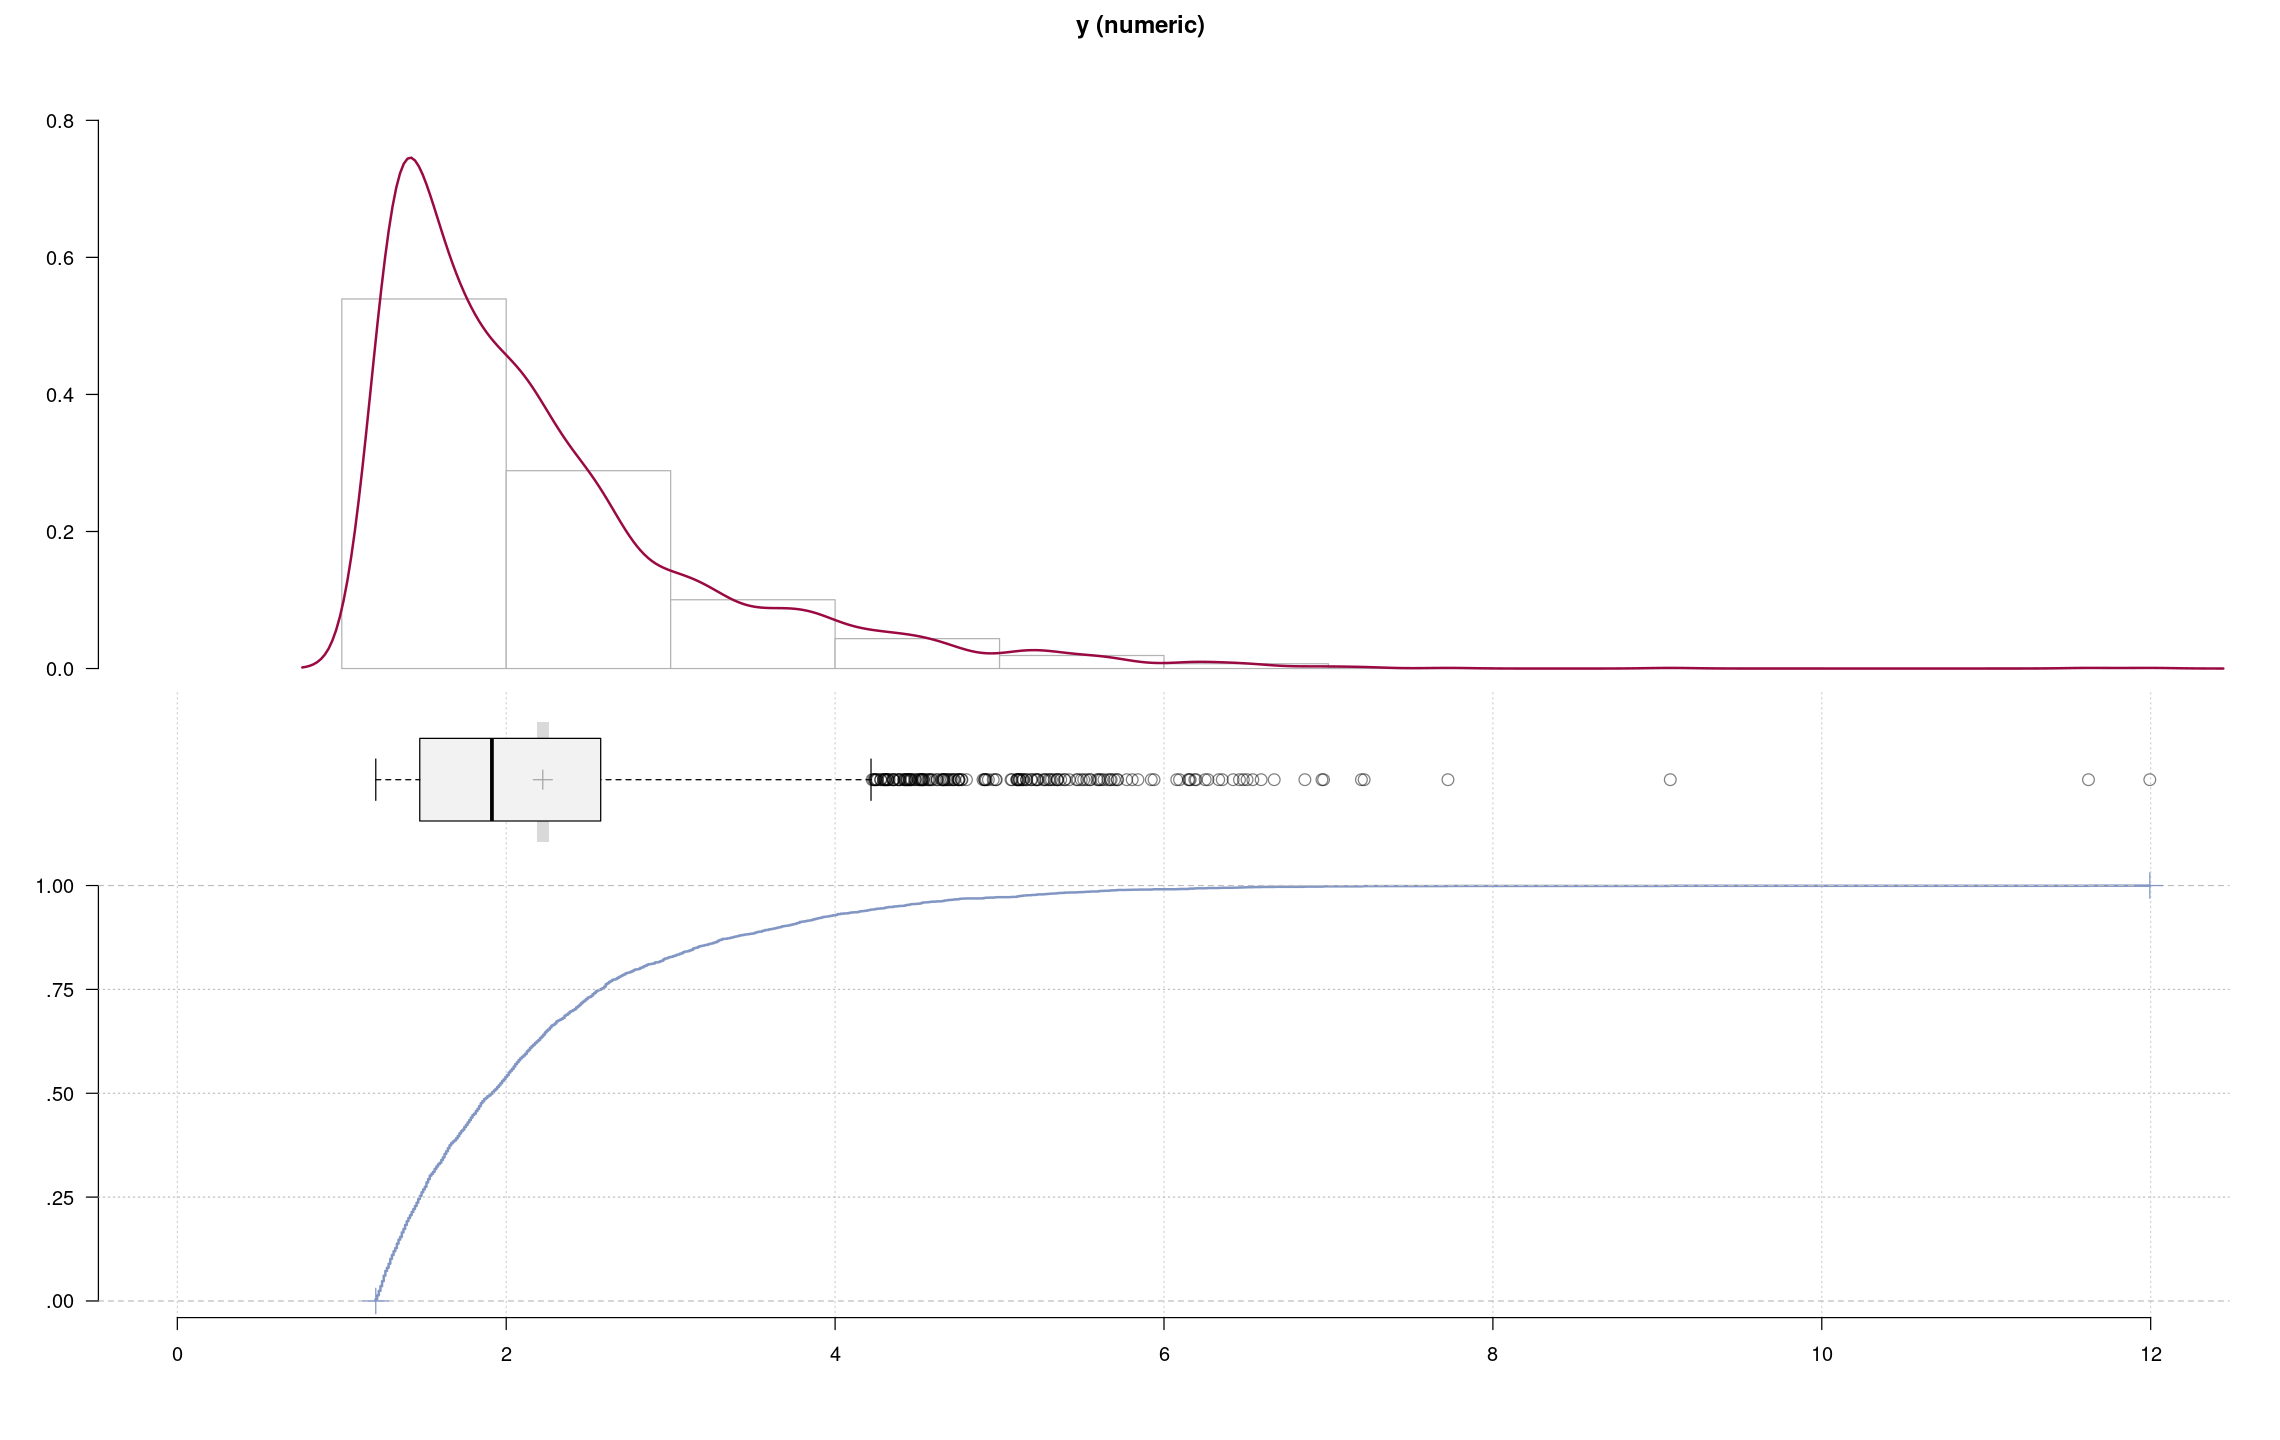

In [6]:
nlargest <- 3000
y <- extract_nlargest_sample(x, n = nlargest)
Desc(y)

# Estimation

In [7]:
gev_mixture_model_object <- fit_stationary_gev_mixture_model(x = x,
                                                             nlargest = 3000,
                                                             block_sizes = NULL,
                                                             minimum_nblocks = 50,
                                                             threshold = NULL,
                                                             confidence_level = 0.95,
                                                             use_extremal_index = TRUE,
                                                             use_uniform_prior = TRUE,
                                                             method = c("MLE", "GMLE", "Lmoments")[1])


In [8]:
print(names(gev_mixture_model_object))

 [1] "threshold"                            
 [2] "equivalent_block_sizes"               
 [3] "unequivalent_block_sizes"             
 [4] "selected_block_sizes"                 
 [5] "unselected_block_sizes"               
 [6] "use_uniform_prior"                    
 [7] "weights"                              
 [8] "frequencies"                          
 [9] "use_extremal_index"                   
[10] "extremal_indexes"                     
[11] "negative_log_likelihoods"             
[12] "information_criteria"                 
[13] "unnormalized_gev_parameters_object"   
[14] "normalized_gev_parameters_object"     
[15] "full_normalized_gev_parameters_object"
[16] "partial_data"                         
[17] "all_data"                             
[18] "selected_model_per_obs"               
[19] "selected_gev_models"                  
[20] "several_residuals"                    
[21] "several_residuals_fit"                
[22] "several_residuals_diagnosics"         


In [9]:
print(gev_mixture_model_object$full_normalized_gev_parameters_object)

       loc_star   scale_star      shape_star
14 1.4707665152 1.0131986562 -0.005669190784
37 0.2483297476 1.5106374841 -0.067068293284
38 3.0534668741 0.3487585461  0.218576136340
39 2.9553935405 0.3658549916  0.209518150668
45 2.4300487921 0.5608395133  0.121057550356
48 2.2937866215 0.5848952979  0.114998701903
51 2.7813734066 0.4770049068  0.147146241068
56 3.0520805198 0.3575966671  0.204821101445
57 2.8288867307 0.4113532372  0.182438130779
60 2.6208421437 0.4687817628  0.162742579868


In [10]:
print(gev_mixture_model_object$weights)

           14            37            38            39            45 
0.01625320787 0.02138579983 0.17878528657 0.05731394354 0.09666381523 
           48            51            56            57            60 
0.07014542344 0.04704875962 0.21727972626 0.09580838323 0.19931565441 


In [11]:
print(which.max(gev_mixture_model_object$weights))

56 
 8 


In [12]:
print(which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 3


In [13]:
print(which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 2


In [14]:
print(gev_mixture_model_object$information_criteria)

        AIC         BIC 
2533.868193 2768.116528 


# Diagnostic

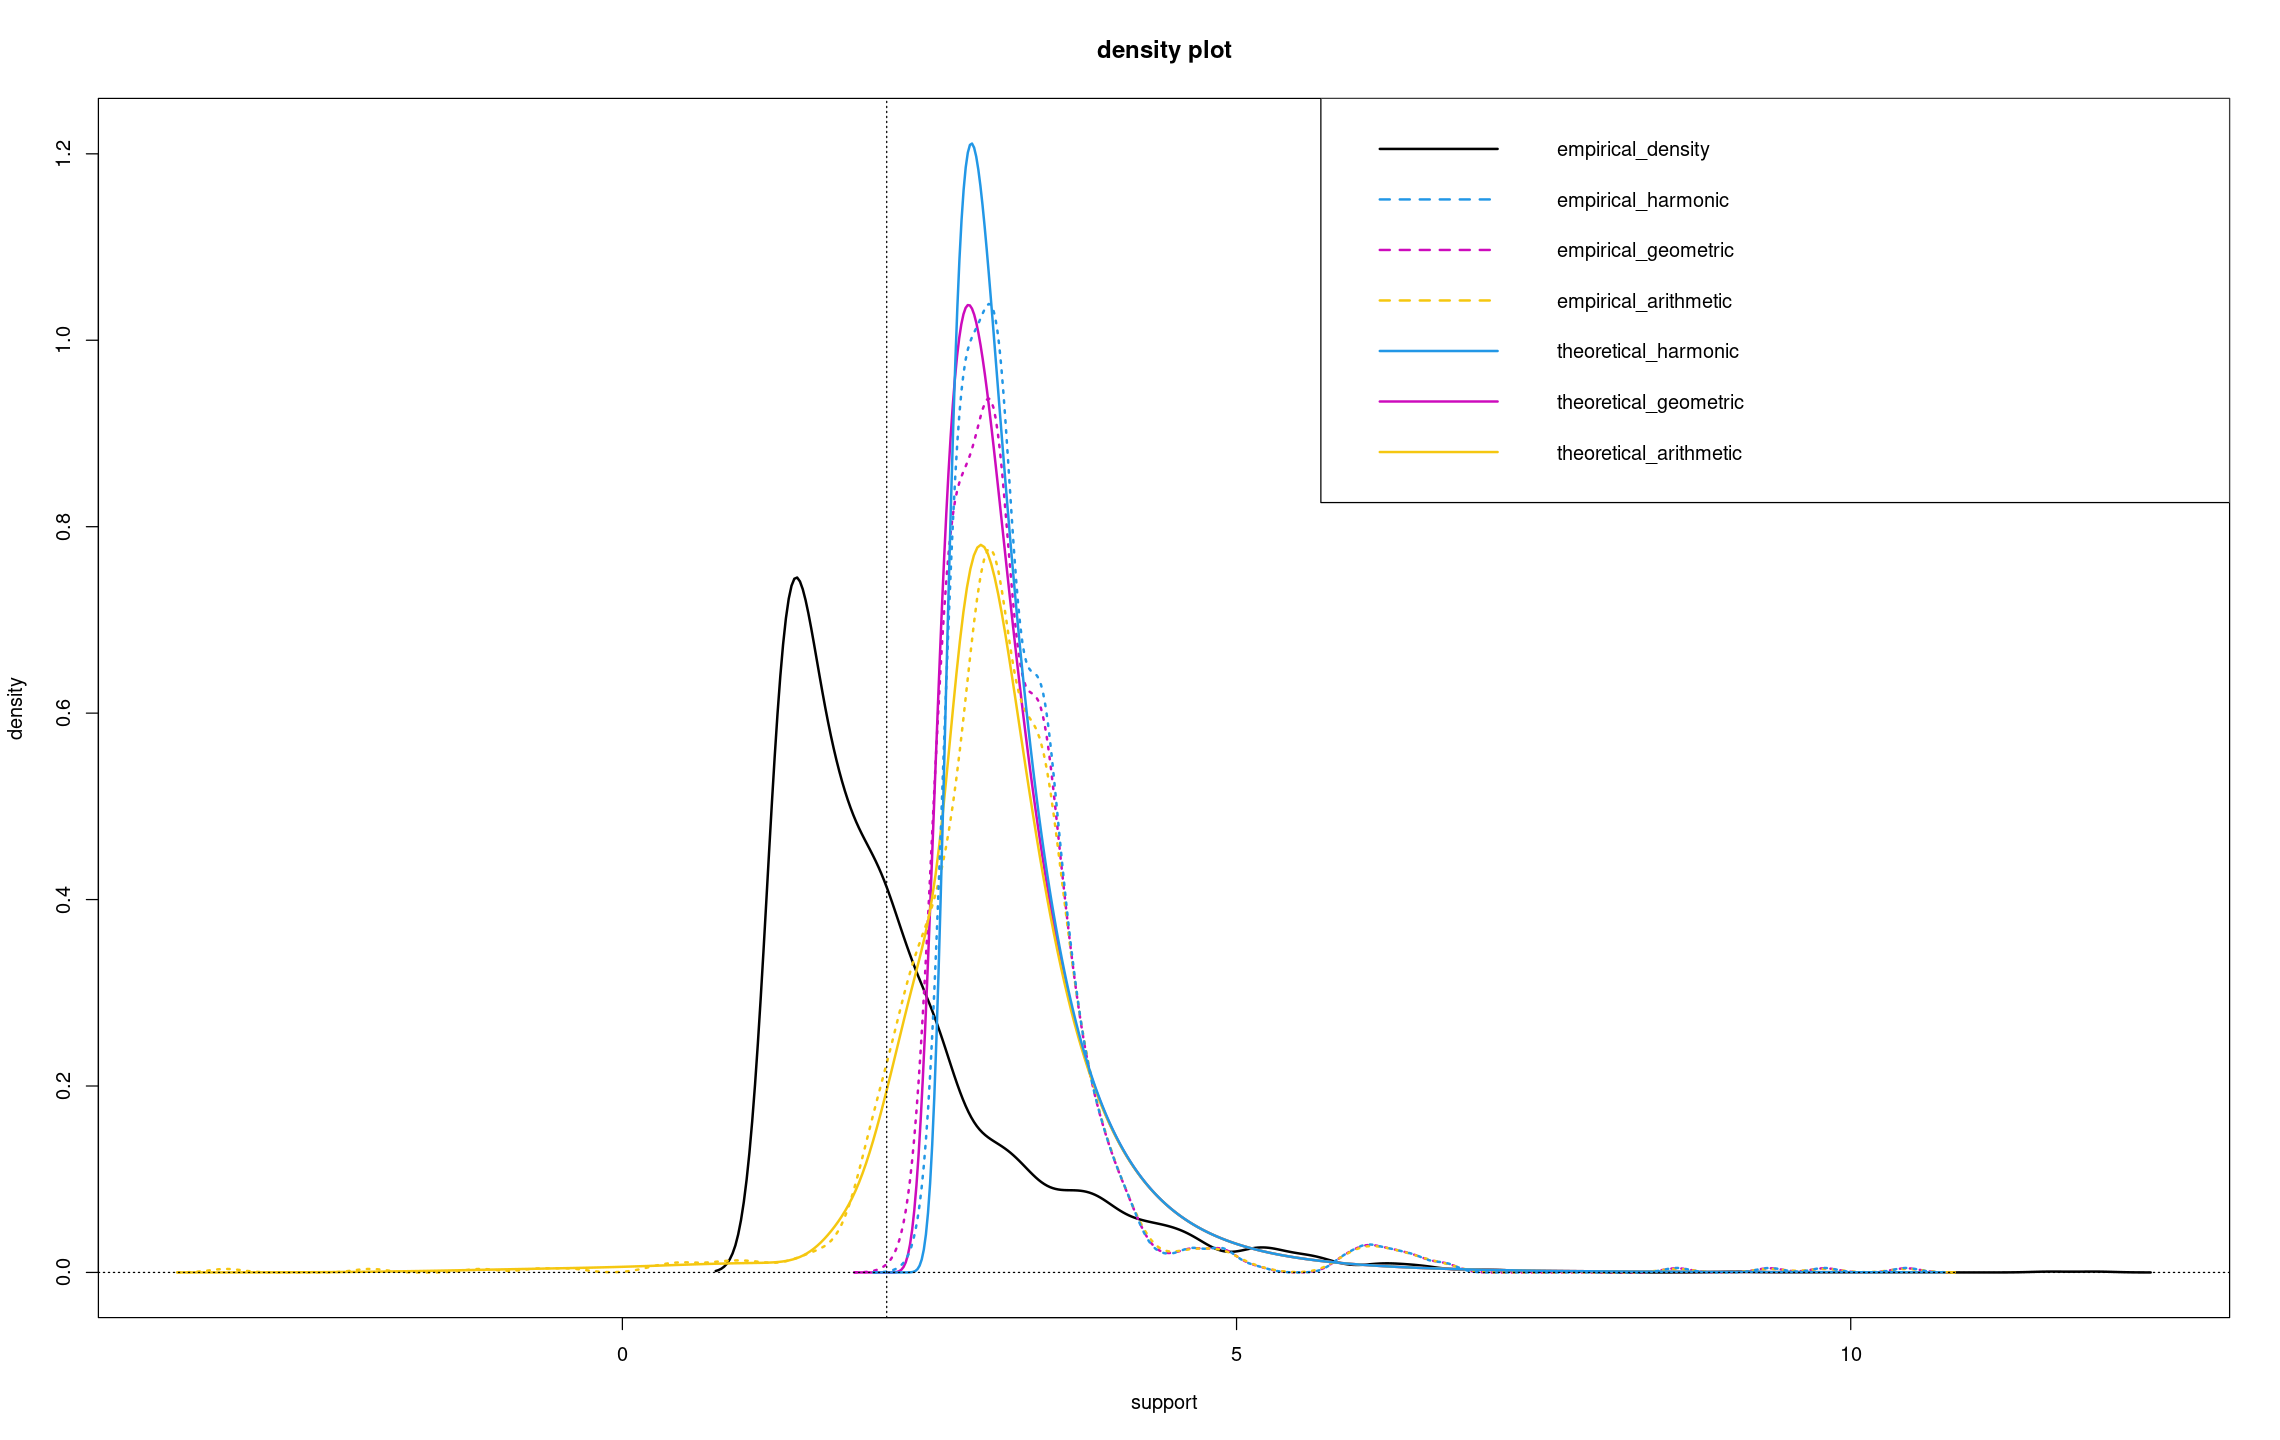

In [15]:
plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = 0,
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

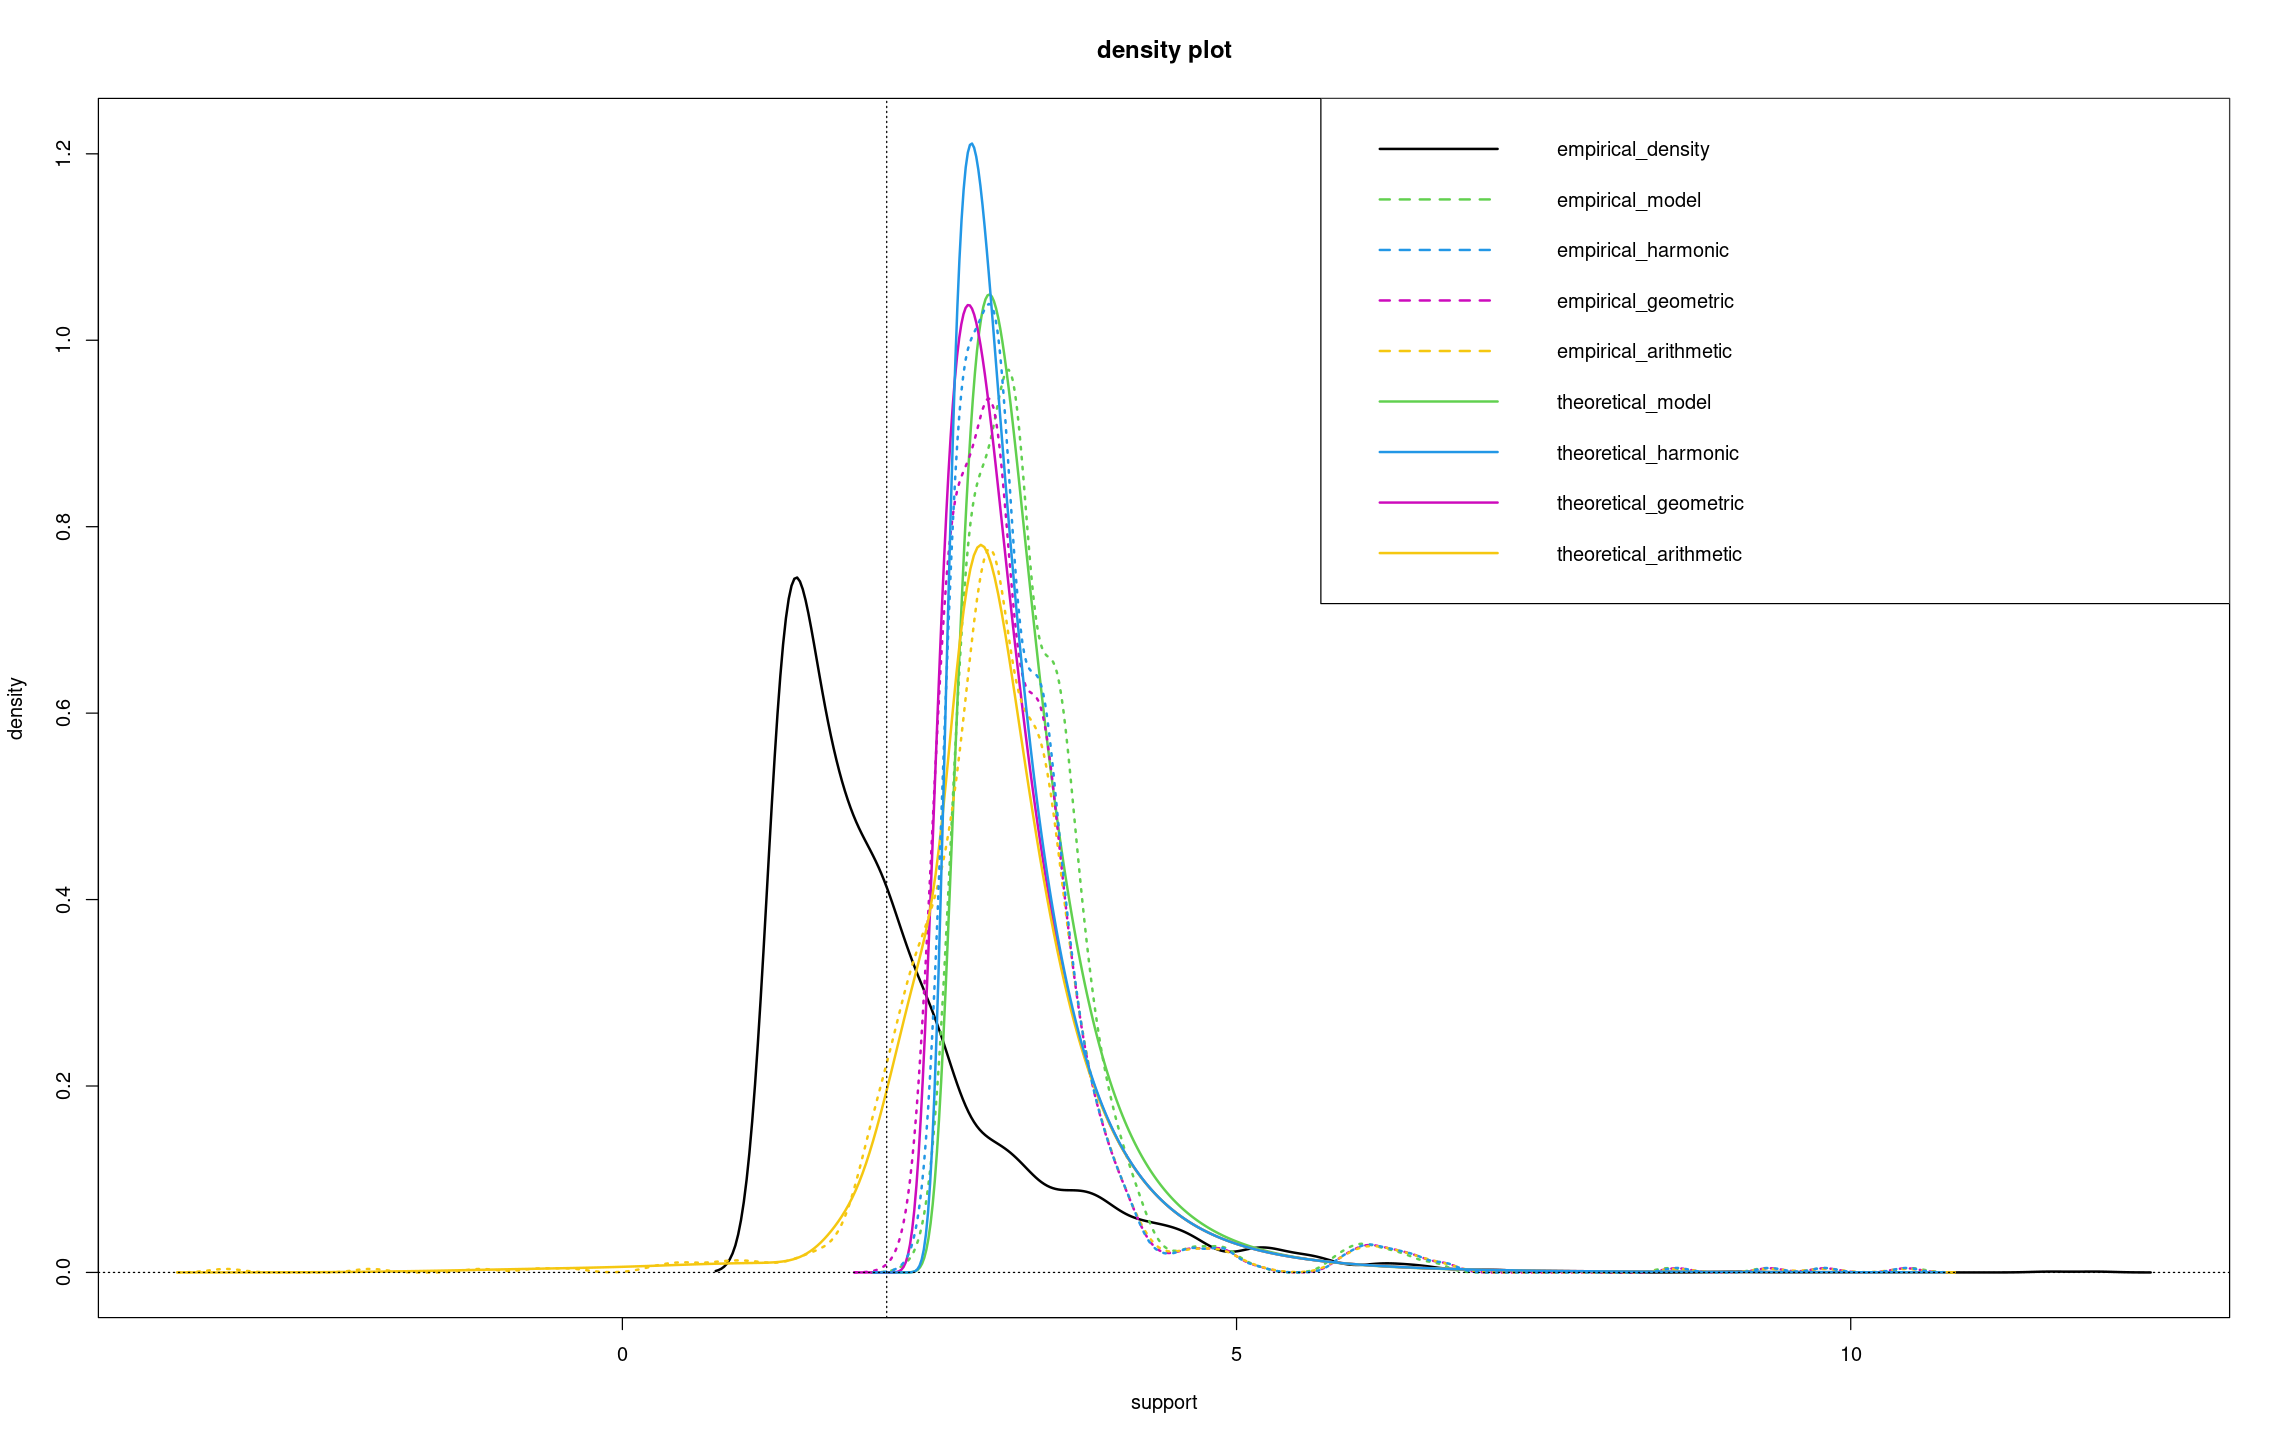

In [16]:
plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$weights),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

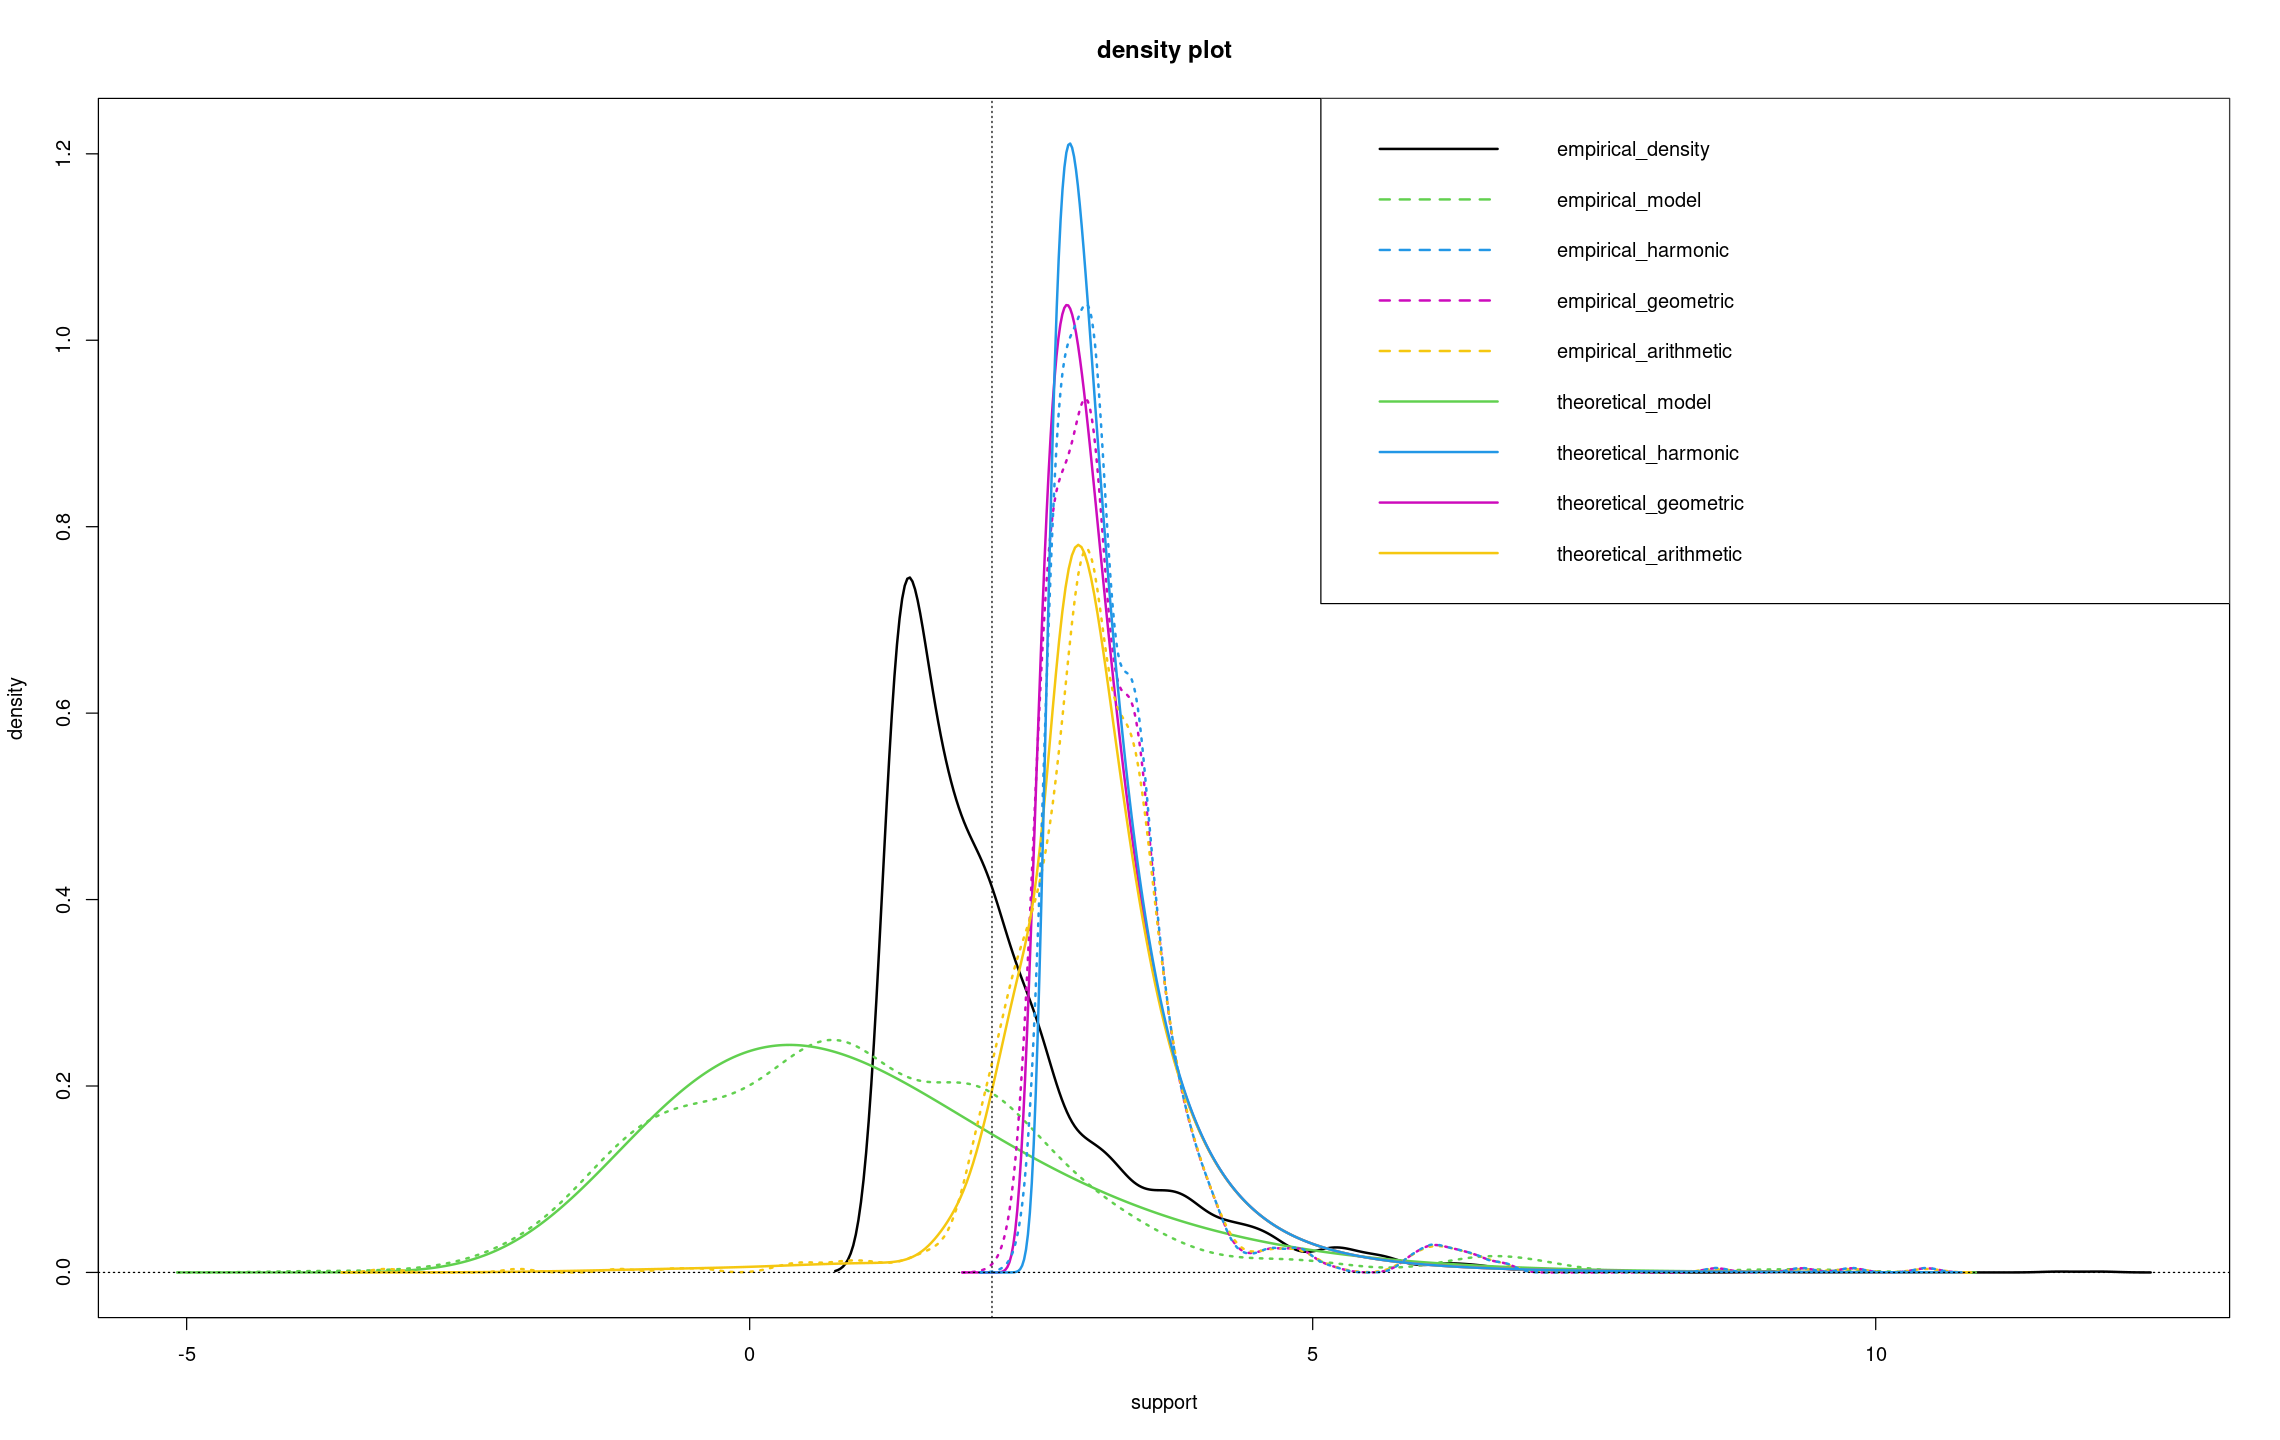

In [17]:
plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

# Quantiles

In [18]:
alpha <- n^(-2)

print(alpha)

[1] 1e-08


In [26]:
true_quantile <- qexp(p = 1 - alpha)

print(true_quantile)

[1] 18.42068074


In [20]:
results_geometric <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                    alpha = alpha,
                                                                    do.ci = TRUE,
                                                                    confidence_level = 0.95,
                                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                    iterations = 100)

results_geometric

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
14,8.483338216,18.09039919,27.69746016
37,7.838442010,15.67373142,23.50902082
38,-111.850314773,70.19242036,252.23515550
39,-93.479475466,65.57813412,224.63574371
45,-26.599950878,35.03713545,96.67422177
48,-25.920524437,34.04137675,94.00327794
51,-45.669513815,40.37200417,126.41352215
56,-103.133237389,60.66580570,224.46484879
57,-85.097319952,52.71897249,190.53526493


In [21]:
results_arithmetic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                     iterations = 100)

results_arithmetic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
14,8.483338216,18.09039919,27.69746016
37,7.838442010,15.67373142,23.50902082
38,-111.850314773,70.19242036,252.23515550
39,-93.479475466,65.57813412,224.63574371
45,-26.599950878,35.03713545,96.67422177
48,-25.920524437,34.04137675,94.00327794
51,-45.669513815,40.37200417,126.41352215
56,-103.133237389,60.66580570,224.46484879
57,-85.097319952,52.71897249,190.53526493


In [22]:
results_harmonic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                     iterations = 100)

results_harmonic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
14,8.483338216,18.09039919,27.69746016
37,7.838442010,15.67373142,23.50902082
38,-111.850314773,70.19242036,252.23515550
39,-93.479475466,65.57813412,224.63574371
45,-26.599950878,35.03713545,96.67422177
48,-25.920524437,34.04137675,94.00327794
51,-45.669513815,40.37200417,126.41352215
56,-103.133237389,60.66580570,224.46484879
57,-85.097319952,52.71897249,190.53526493


In [23]:
options(repr.plot.width=23, repr.plot.height=6)

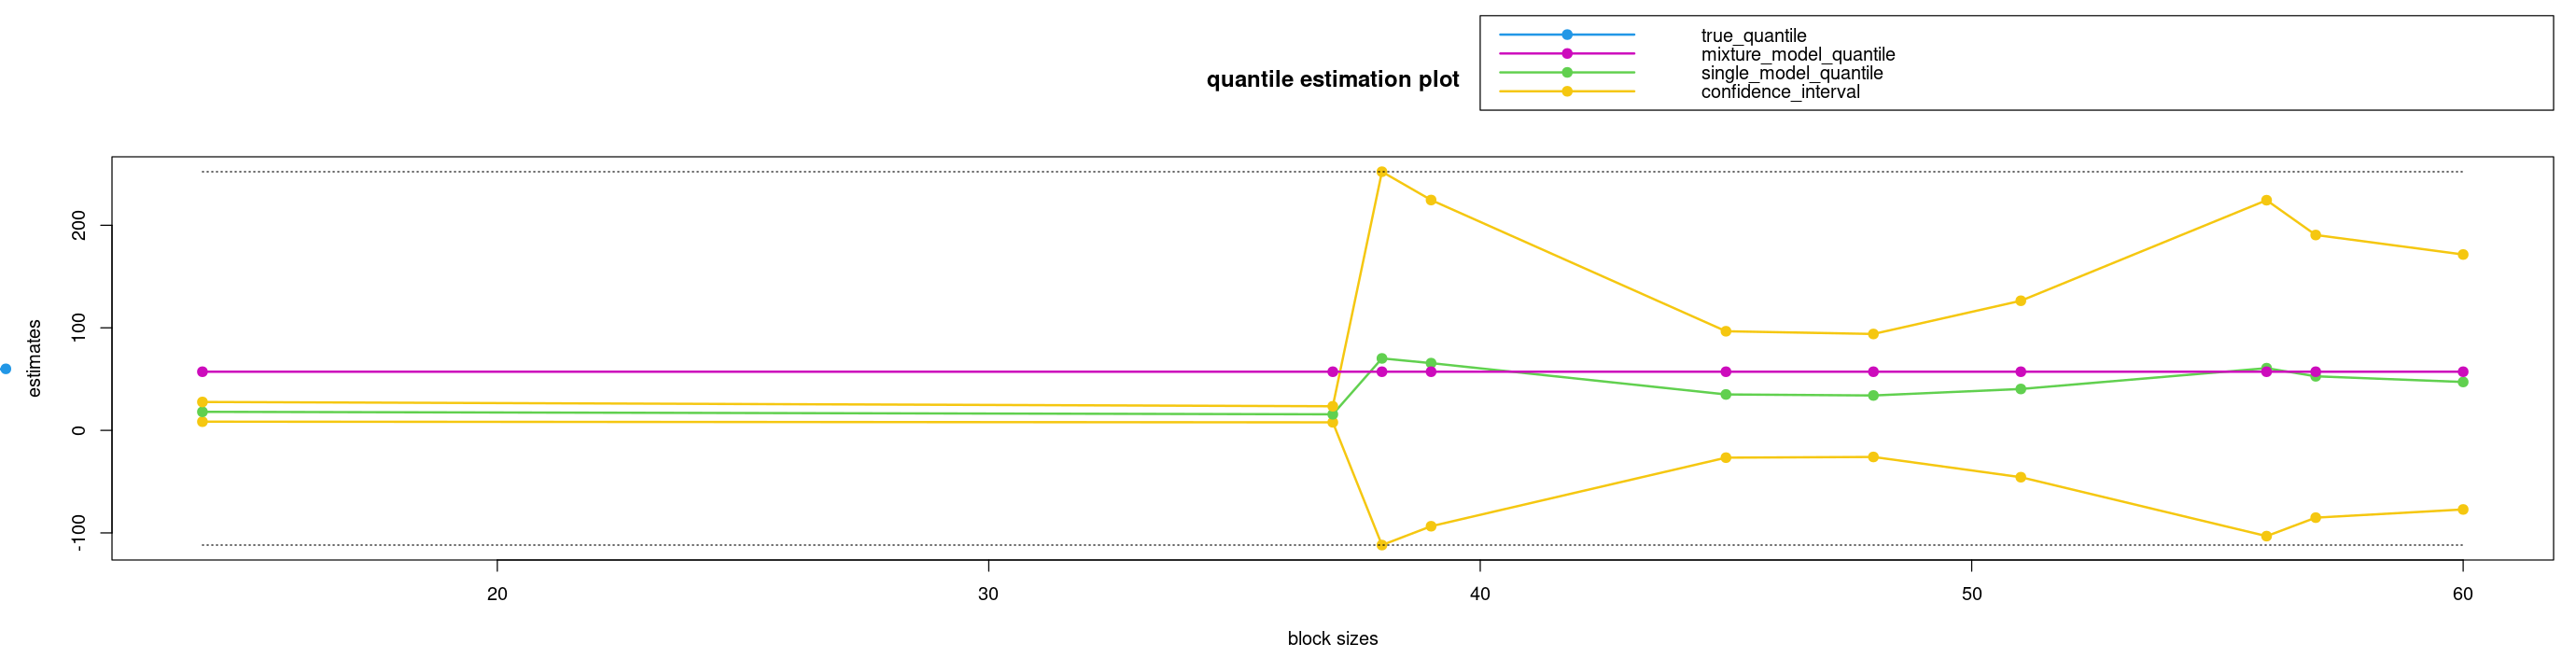

In [24]:
plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = NULL,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")

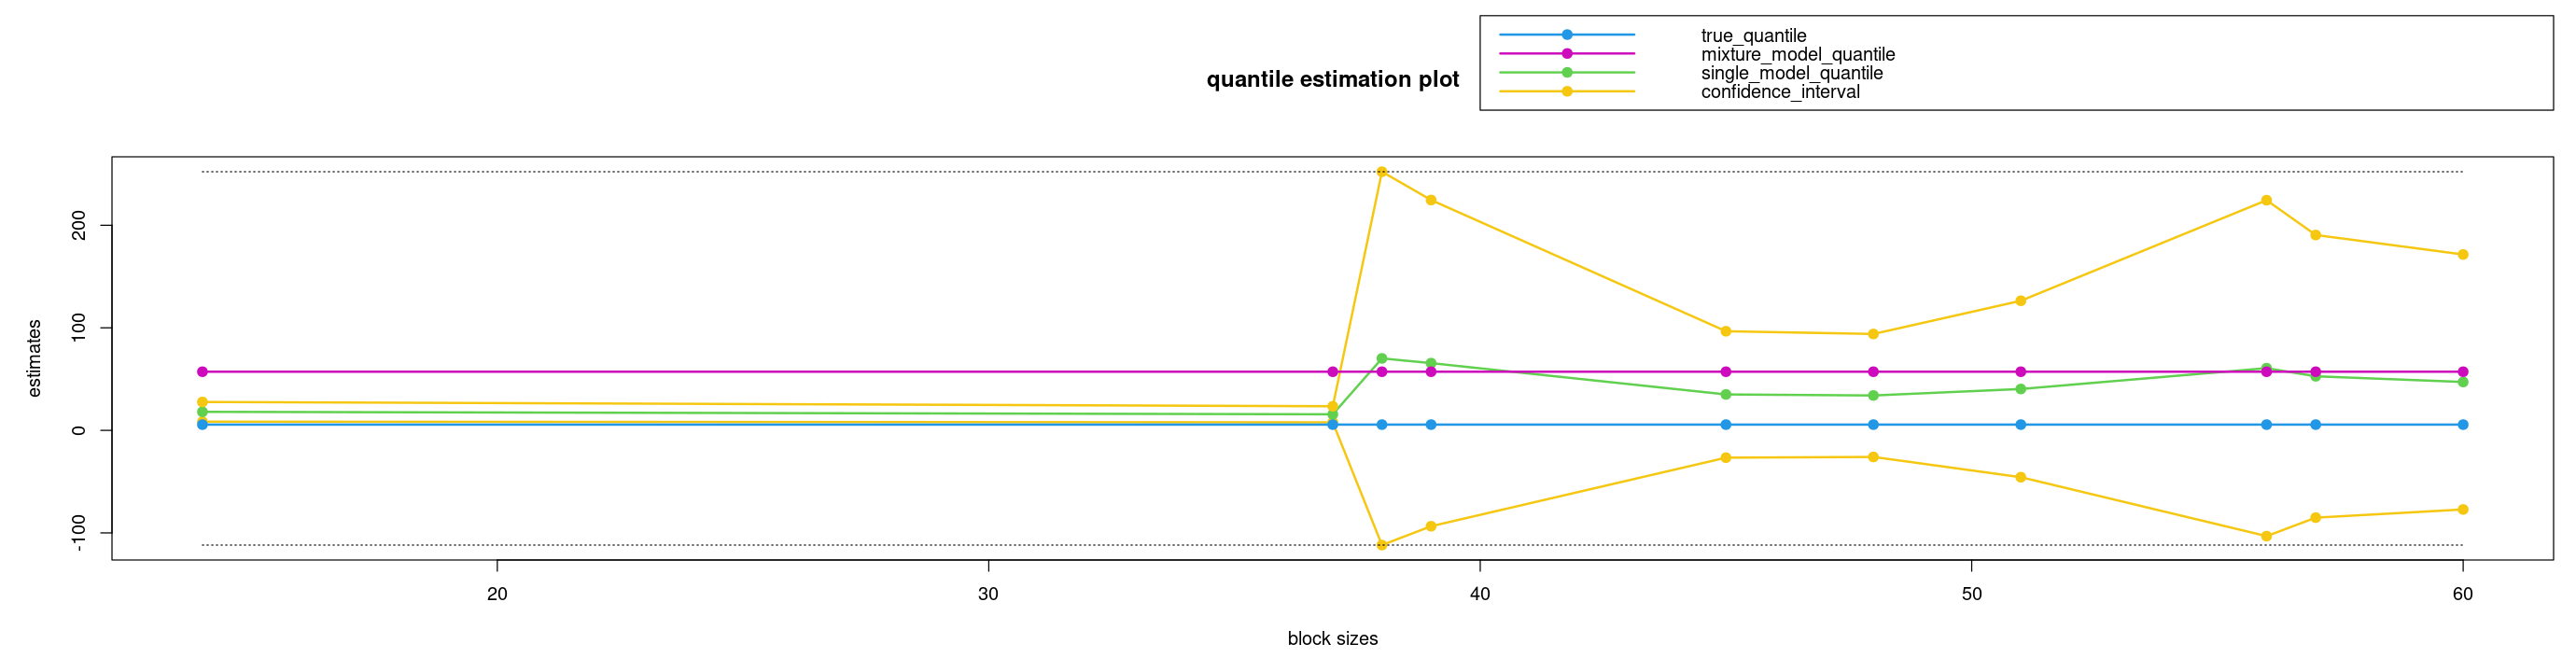

In [25]:
plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = true_quantile,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")
